In [6]:
# Import modelflow

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [10]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

Load model


In [32]:
countries_of_interest = [country for country in masia.countries_ASEAN if country not in ['BRN','SGP']]
                         
instruments = [[f'{country}_GCARBR_A'] for country in countries_of_interest]
target_var  = [f'{country}_CO2' for country in countries_of_interest]
delay = 6
target_growth = 1.01

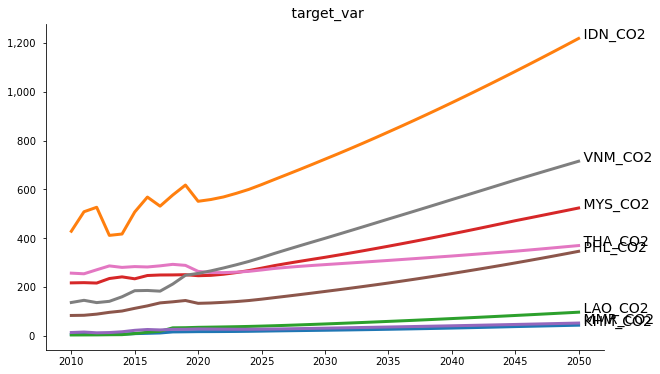

In [33]:
model.plot_basis('target_var',df = masia.basedf.loc[2010:,target_var],trans=masia.var_description,legend=0);

In [34]:
[i[0] for i in instruments]

['KHM_GCARBR_A',
 'IDN_GCARBR_A',
 'LAO_GCARBR_A',
 'MYS_GCARBR_A',
 'MMR_GCARBR_A',
 'PHL_GCARBR_A',
 'THA_GCARBR_A',
 'VNM_GCARBR_A']

In [35]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/7

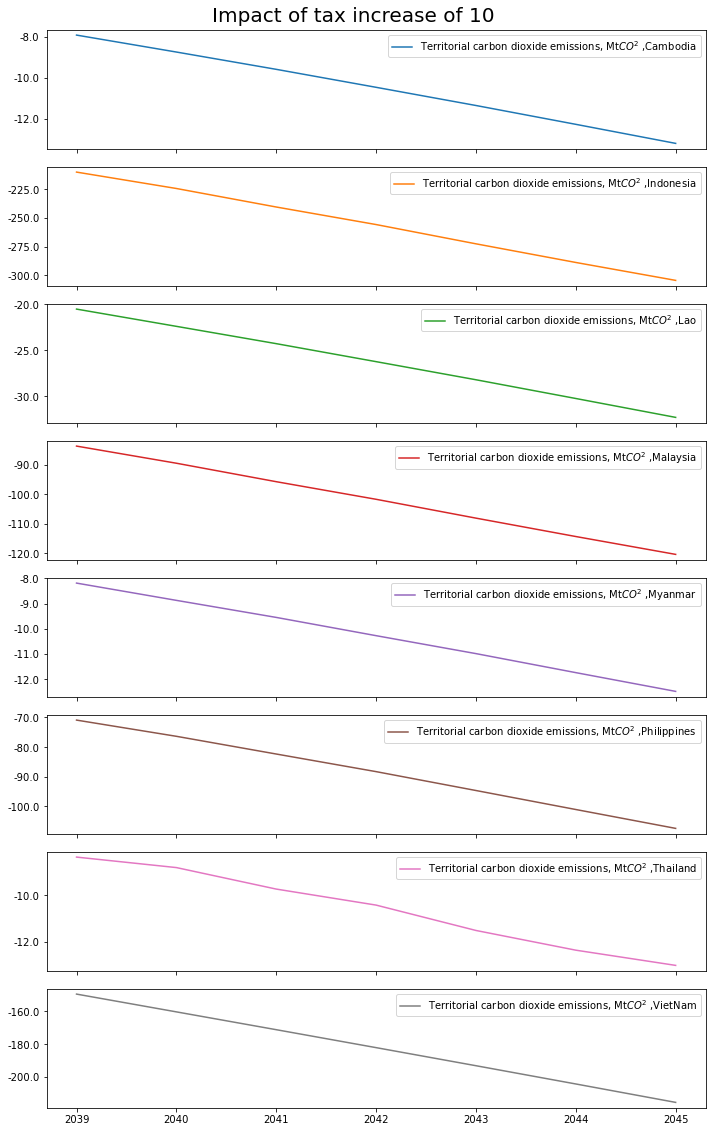

In [36]:
masia[target_var].dif.rename().plot(colrow  = 1,title = 'Impact of tax increase of 10 ',top=0.96,sharey=0);
masia[target_var].dif.df;
    

In [37]:
target_before = baseline[target_var].loc[2022+delay-1:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * (1+{target_growth}/100)' for t in target_var)
print(calclines)

target = target_before.mfcalc(calclines)

KHM_CO2 = KHM_CO2(-1) * (1+1.01/100)
IDN_CO2 = IDN_CO2(-1) * (1+1.01/100)
LAO_CO2 = LAO_CO2(-1) * (1+1.01/100)
MYS_CO2 = MYS_CO2(-1) * (1+1.01/100)
MMR_CO2 = MMR_CO2(-1) * (1+1.01/100)
PHL_CO2 = PHL_CO2(-1) * (1+1.01/100)
THA_CO2 = THA_CO2(-1) * (1+1.01/100)
VNM_CO2 = VNM_CO2(-1) * (1+1.01/100)


       KHM_CO2   IDN_CO2   LAO_CO2   MYS_CO2   MMR_CO2   PHL_CO2   THA_CO2  \
2027       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2028  0.033595  0.031298  0.042044  0.028876  0.030379  0.038762  0.014428   
2029  0.032030  0.030855  0.042274  0.027363  0.030804  0.038181  0.012927   
2030  0.031189  0.030467  0.042049  0.026335  0.030582  0.037624  0.011931   
2031  0.032204  0.029554  0.041414  0.027129  0.029820  0.036164  0.011584   
2032  0.033029  0.029370  0.040735  0.026956  0.029290  0.035928  0.011569   
2033  0.033718  0.029085  0.040112  0.026844  0.028755  0.035506  0.011524   
2034  0.034302  0.028769  0.039543  0.026732  0.028243  0.035024  0.011444   
2035  0.034789  0.028560  0.039013  0.026491  0.027804  0.034724  0.011406   
2036  0.034623  0.027859  0.037735  0.026422  0.027480  0.034571  0.011683   
2037  0.034917  0.027553  0.037300  0.026247  0.027062  0.034139  0.011615   
2038  0.035076  0.027212  0.036787  0.026079  0.026678  0.033754

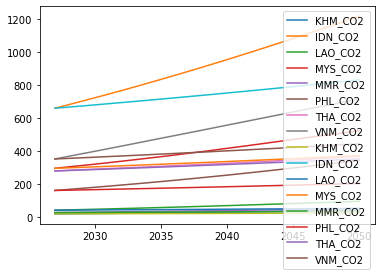

In [38]:
t = pd.concat([target_before.rename(columns={}),target.rename(columns={})],axis=1)
t.plot()
print(t.pct_change())

In [42]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=5.,defaultconv=5,varimpulse=True,nonlin=True)

In [43]:
t_i.debug=1
res = t_i(delay=delay,shortfall=0)

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Period: 2027


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2027,  iteration 0
Distance to target   :
KHM_CO2   -1.663949e-10
IDN_CO2   -1.323315e-09
LAO_CO2   -1.269740e-10
MYS_CO2   -1.965873e-09
MMR_CO2   -1.133138e-10
PHL_CO2   -5.916831e-10
THA_CO2   -1.750720e-09
VNM_CO2   -3.859270e-09
Name: 2027, dtype: float64

Period: 2028


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 0
Distance to target   :
KHM_CO2    -0.476912
IDN_CO2   -14.000026
LAO_CO2    -1.359085
MYS_CO2    -5.561220
MMR_CO2    -0.573349
PHL_CO2    -4.645717
THA_CO2    -1.212902
VNM_CO2   -12.057795
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.611561
IDN_GCARBR_A    2.486004
LAO_GCARBR_A    3.368634
MYS_GCARBR_A    3.390130
MMR_GCARBR_A    3.224749
PHL_GCARBR_A    5.407800
THA_GCARBR_A    0.592653
VNM_GCARBR_A    4.978618
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 1
Distance to target   :
KHM_CO2     0.218534
IDN_CO2    12.198973
LAO_CO2     0.873662
MYS_CO2     3.948978
MMR_CO2     0.233289
PHL_CO2     4.345705
THA_CO2     0.119618
VNM_CO2     9.983989
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -1.197552
IDN_GCARBR_A   -2.165878
LAO_GCARBR_A   -2.164943
MYS_GCARBR_A   -2.407381
MMR_GCARBR_A   -1.310966
PHL_GCARBR_A   -5.057735
THA_GCARBR_A   -0.058912
VNM_GCARBR_A   -4.122102
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 2
Distance to target   :
KHM_CO2    -0.079560
IDN_CO2   -10.193406
LAO_CO2    -0.467929
MYS_CO2    -2.577273
MMR_CO2    -0.075560
PHL_CO2    -3.962215
THA_CO2    -0.010037
VNM_CO2    -7.773377
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    0.437353
IDN_GCARBR_A    1.809545
LAO_GCARBR_A    1.159322
MYS_GCARBR_A    1.571299
MMR_GCARBR_A    0.424033
PHL_GCARBR_A    4.610779
THA_GCARBR_A    0.005167
VNM_GCARBR_A    3.209356
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 3
Distance to target   :
KHM_CO2    0.032695
IDN_CO2    8.860717
LAO_CO2    0.286800
MYS_CO2    1.794765
MMR_CO2    0.027177
PHL_CO2    3.707879
THA_CO2    0.001001
VNM_CO2    6.402777
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -0.180803
IDN_GCARBR_A   -1.572804
LAO_GCARBR_A   -0.710426
MYS_GCARBR_A   -1.094332
MMR_GCARBR_A   -0.152026
PHL_GCARBR_A   -4.314424
THA_GCARBR_A   -0.000603
VNM_GCARBR_A   -2.643472
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 4
Distance to target   :
KHM_CO2   -0.013002
IDN_CO2   -7.473023
LAO_CO2   -0.164954
MYS_CO2   -1.201959
MMR_CO2   -0.009549
PHL_CO2   -3.396853
THA_CO2   -0.000285
VNM_CO2   -5.070390
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    0.072716
IDN_GCARBR_A    1.326368
LAO_GCARBR_A    0.408477
MYS_GCARBR_A    0.732962
MMR_GCARBR_A    0.052966
PHL_GCARBR_A    3.952232
THA_GCARBR_A    0.000141
VNM_GCARBR_A    2.093390
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 5
Distance to target   :
KHM_CO2    0.005331
IDN_CO2    6.480676
LAO_CO2    0.098944
MYS_CO2    0.828677
MMR_CO2    0.003452
PHL_CO2    3.179383
THA_CO2    0.000192
VNM_CO2    4.157182
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -0.030468
IDN_GCARBR_A   -1.150158
LAO_GCARBR_A   -0.244904
MYS_GCARBR_A   -0.505404
MMR_GCARBR_A   -0.018732
PHL_GCARBR_A   -3.699009
THA_GCARBR_A   -0.000027
VNM_GCARBR_A   -1.716372
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 6
Distance to target   :
KHM_CO2   -0.002237
IDN_CO2   -5.497288
LAO_CO2   -0.058065
MYS_CO2   -0.561256
MMR_CO2   -0.001295
PHL_CO2   -2.923050
THA_CO2   -0.000192
VNM_CO2   -3.322070
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    0.013257
IDN_GCARBR_A    0.975575
LAO_GCARBR_A    0.143624
MYS_GCARBR_A    0.342361
MMR_GCARBR_A    0.006661
PHL_GCARBR_A    3.400643
THA_GCARBR_A   -0.000015
VNM_GCARBR_A    1.371602
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 7
Distance to target   :
KHM_CO2    0.000990
IDN_CO2    4.757391
LAO_CO2    0.034603
MYS_CO2    0.385440
MMR_CO2    0.000527
PHL_CO2    2.735915
THA_CO2    0.000169
VNM_CO2    2.714101
Name: 2028, dtype: float64

Period: 2029


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2029,  iteration 0
Distance to target   :
KHM_CO2   -0.390847
IDN_CO2   -8.103985
LAO_CO2   -1.177516
MYS_CO2   -4.500344
MMR_CO2   -0.526064
PHL_CO2   -1.406602
THA_CO2   -0.747797
VNM_CO2   -7.662190
Name: 2029, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.354017
IDN_GCARBR_A    1.680699
LAO_GCARBR_A    3.262452
MYS_GCARBR_A    3.095918
MMR_GCARBR_A    3.176911
PHL_GCARBR_A    1.943643
THA_GCARBR_A    0.376407
VNM_GCARBR_A    3.819962
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2029,  iteration 1
Distance to target   :
KHM_CO2    0.156627
IDN_CO2    6.697487
LAO_CO2    0.643553
MYS_CO2    2.988584
MMR_CO2    0.179367
PHL_CO2    1.242661
THA_CO2    0.057645
VNM_CO2    6.033419
Name: 2029, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -0.944251
IDN_GCARBR_A   -1.388727
LAO_GCARBR_A   -1.782682
MYS_GCARBR_A   -2.055994
MMR_GCARBR_A   -1.082492
PHL_GCARBR_A   -1.716394
THA_GCARBR_A   -0.029384
VNM_GCARBR_A   -3.007716
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2029,  iteration 2
Distance to target   :
KHM_CO2   -0.050958
IDN_CO2   -5.365478
LAO_CO2   -0.286624
MYS_CO2   -1.838375
MMR_CO2   -0.048346
PHL_CO2   -1.083658
THA_CO2   -0.003943
VNM_CO2   -4.537855
Name: 2029, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    0.308304
IDN_GCARBR_A    1.112313
LAO_GCARBR_A    0.793761
MYS_GCARBR_A    1.264791
MMR_GCARBR_A    0.291396
PHL_GCARBR_A    1.496233
THA_GCARBR_A    0.002190
VNM_GCARBR_A    2.262085
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2029,  iteration 3
Distance to target   :
KHM_CO2    0.018247
IDN_CO2    4.414545
LAO_CO2    0.144919
MYS_CO2    1.193959
MMR_CO2    0.014280
PHL_CO2    0.955332
THA_CO2    0.000318
VNM_CO2    3.546685
Name: 2029, dtype: float64

Period: 2030


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2030,  iteration 0
Distance to target   :
KHM_CO2   -0.313672
IDN_CO2   -7.804355
LAO_CO2   -0.913125
MYS_CO2   -3.171044
MMR_CO2   -0.453927
PHL_CO2   -3.105793
THA_CO2   -0.442486
VNM_CO2   -5.456817
Name: 2030, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.077313
IDN_GCARBR_A    1.730456
LAO_GCARBR_A    2.851307
MYS_GCARBR_A    2.364803
MMR_GCARBR_A    2.924905
PHL_GCARBR_A    4.544483
THA_GCARBR_A    0.228921
VNM_GCARBR_A    2.755385
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2030,  iteration 1
Distance to target   :
KHM_CO2    0.116445
IDN_CO2    5.288687
LAO_CO2    0.447170
MYS_CO2    1.847331
MMR_CO2    0.131468
PHL_CO2    2.228328
THA_CO2    0.029949
VNM_CO2    2.941705
Name: 2030, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -0.771200
IDN_GCARBR_A   -1.172567
LAO_GCARBR_A   -1.396036
MYS_GCARBR_A   -1.377592
MMR_GCARBR_A   -0.846419
PHL_GCARBR_A   -3.260294
THA_GCARBR_A   -0.015403
VNM_GCARBR_A   -1.485401
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2030,  iteration 2
Distance to target   :
KHM_CO2   -0.036373
IDN_CO2   -3.390863
LAO_CO2   -0.183153
MYS_CO2   -1.007315
MMR_CO2   -0.030424
PHL_CO2   -1.494634
THA_CO2   -0.001924
VNM_CO2   -1.474250
Name: 2030, dtype: float64

Period: 2031


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2031,  iteration 0
Distance to target   :
KHM_CO2    -0.366735
IDN_CO2   -15.208978
LAO_CO2    -1.163418
MYS_CO2    -5.647954
MMR_CO2    -0.441306
PHL_CO2    -5.380574
THA_CO2    -0.336187
VNM_CO2   -10.350741
Name: 2031, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.652082
IDN_GCARBR_A    3.824849
LAO_GCARBR_A    3.968112
MYS_GCARBR_A    4.645523
MMR_GCARBR_A    3.003911
PHL_GCARBR_A    8.879359
THA_GCARBR_A    0.178545
VNM_GCARBR_A    5.859203
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2031,  iteration 1
Distance to target   :
KHM_CO2     0.128217
IDN_CO2    10.274539
LAO_CO2     0.495698
MYS_CO2     3.201819
MMR_CO2     0.110410
PHL_CO2     3.741080
THA_CO2     0.021632
VNM_CO2     5.537540
Name: 2031, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A   -0.927642
IDN_GCARBR_A   -2.583692
LAO_GCARBR_A   -1.689912
MYS_GCARBR_A   -2.633409
MMR_GCARBR_A   -0.749979
PHL_GCARBR_A   -6.173301
THA_GCARBR_A   -0.011099
VNM_GCARBR_A   -3.134587
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2031,  iteration 2
Distance to target   :
KHM_CO2   -0.036329
IDN_CO2   -6.218550
LAO_CO2   -0.160376
MYS_CO2   -1.605271
MMR_CO2   -0.021734
PHL_CO2   -2.292378
THA_CO2   -0.001507
VNM_CO2   -2.575335
Name: 2031, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    0.263076
IDN_GCARBR_A    1.563624
LAO_GCARBR_A    0.546195
MYS_GCARBR_A    1.320207
MMR_GCARBR_A    0.146702
PHL_GCARBR_A    3.782500
THA_GCARBR_A    0.000451
VNM_GCARBR_A    1.457798
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2031,  iteration 3
Distance to target   :
KHM_CO2    0.011197
IDN_CO2    4.080170
LAO_CO2    0.059330
MYS_CO2    0.867460
MMR_CO2    0.004604
PHL_CO2    1.547471
THA_CO2    0.000207
VNM_CO2    1.299289
Name: 2031, dtype: float64

Period: 2032


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2032,  iteration 0
Distance to target   :
KHM_CO2   -0.300240
IDN_CO2   -6.714818
LAO_CO2   -0.758644
MYS_CO2   -3.454557
MMR_CO2   -0.352376
PHL_CO2   -1.902670
THA_CO2   -0.326787
VNM_CO2   -6.325478
Name: 2032, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.336345
IDN_GCARBR_A    1.855989
LAO_GCARBR_A    2.772448
MYS_GCARBR_A    3.107911
MMR_GCARBR_A    2.510283
PHL_GCARBR_A    3.420989
THA_GCARBR_A    0.178744
VNM_GCARBR_A    3.831596
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2032,  iteration 1
Distance to target   :
KHM_CO2    0.093355
IDN_CO2    3.900329
LAO_CO2    0.261221
MYS_CO2    1.759885
MMR_CO2    0.073367
PHL_CO2    1.095940
THA_CO2    0.020176
VNM_CO2    2.639113
Name: 2032, dtype: float64

Period: 2033


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2033,  iteration 0
Distance to target   :
KHM_CO2   -0.195558
IDN_CO2   -6.431943
LAO_CO2   -0.427916
MYS_CO2   -2.353701
MMR_CO2   -0.232203
PHL_CO2   -2.207137
THA_CO2   -0.289496
VNM_CO2   -4.004131
Name: 2033, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    1.639572
IDN_GCARBR_A    1.945005
LAO_GCARBR_A    1.682328
MYS_GCARBR_A    2.288195
MMR_GCARBR_A    1.728980
PHL_GCARBR_A    4.313750
THA_GCARBR_A    0.162114
VNM_GCARBR_A    2.571201
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2033,  iteration 1
Distance to target   :
KHM_CO2    0.054917
IDN_CO2    3.394456
LAO_CO2    0.124623
MYS_CO2    1.077910
MMR_CO2    0.040921
PHL_CO2    1.149669
THA_CO2    0.017125
VNM_CO2    1.323273
Name: 2033, dtype: float64

Period: 2034


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2034,  iteration 0
Distance to target   :
KHM_CO2   -0.232015
IDN_CO2   -6.495531
LAO_CO2   -0.512459
MYS_CO2   -2.952889
MMR_CO2   -0.234465
PHL_CO2   -1.952962
THA_CO2   -0.267092
VNM_CO2   -4.720783
Name: 2034, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.076416
IDN_GCARBR_A    2.126763
LAO_GCARBR_A    2.137126
MYS_GCARBR_A    3.083058
MMR_GCARBR_A    1.812555
PHL_GCARBR_A    4.090918
THA_GCARBR_A    0.152947
VNM_GCARBR_A    3.181259
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2034,  iteration 1
Distance to target   :
KHM_CO2    0.060859
IDN_CO2    3.107042
LAO_CO2    0.131246
MYS_CO2    1.265115
MMR_CO2    0.036779
PHL_CO2    0.898899
THA_CO2    0.015017
VNM_CO2    1.323906
Name: 2034, dtype: float64

Period: 2035


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2035,  iteration 0
Distance to target   :
KHM_CO2   -0.216388
IDN_CO2   -6.411871
LAO_CO2   -0.437344
MYS_CO2   -2.579279
MMR_CO2   -0.210519
PHL_CO2   -2.066278
THA_CO2   -0.257029
VNM_CO2   -4.000513
Name: 2035, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.059467
IDN_GCARBR_A    2.259899
LAO_GCARBR_A    1.925184
MYS_GCARBR_A    2.869472
MMR_GCARBR_A    1.684511
PHL_GCARBR_A    4.611506
THA_GCARBR_A    0.150425
VNM_GCARBR_A    2.808023
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2035,  iteration 1
Distance to target   :
KHM_CO2    0.052133
IDN_CO2    2.777313
LAO_CO2    0.096777
MYS_CO2    1.007178
MMR_CO2    0.029310
PHL_CO2    0.852543
THA_CO2    0.014420
VNM_CO2    0.904490
Name: 2035, dtype: float64

Period: 2036


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2036,  iteration 0
Distance to target   :
KHM_CO2   -0.205687
IDN_CO2   -6.036341
LAO_CO2   -0.386141
MYS_CO2   -2.745822
MMR_CO2   -0.197440
PHL_CO2   -1.983172
THA_CO2   -0.341402
VNM_CO2   -3.524198
Name: 2036, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.076134
IDN_GCARBR_A    2.276029
LAO_GCARBR_A    1.782431
MYS_GCARBR_A    3.238065
MMR_GCARBR_A    1.631784
PHL_GCARBR_A    4.677851
THA_GCARBR_A    0.204611
VNM_GCARBR_A    2.566904
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2036,  iteration 1
Distance to target   :
KHM_CO2    0.046321
IDN_CO2    2.371377
LAO_CO2    0.075215
MYS_CO2    0.984969
MMR_CO2    0.024659
PHL_CO2    0.722365
THA_CO2    0.018935
VNM_CO2    0.661320
Name: 2036, dtype: float64

Period: 2037


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2037,  iteration 0
Distance to target   :
KHM_CO2   -0.204727
IDN_CO2   -6.048461
LAO_CO2   -0.369547
MYS_CO2   -2.626030
MMR_CO2   -0.180983
PHL_CO2   -1.944448
THA_CO2   -0.312637
VNM_CO2   -3.246044
Name: 2037, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.185710
IDN_GCARBR_A    2.424256
LAO_GCARBR_A    1.782326
MYS_GCARBR_A    3.265176
MMR_GCARBR_A    1.541156
PHL_GCARBR_A    4.820582
THA_GCARBR_A    0.191588
VNM_GCARBR_A    2.438205
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2037,  iteration 1
Distance to target   :
KHM_CO2    0.043491
IDN_CO2    2.157656
LAO_CO2    0.064209
MYS_CO2    0.856517
MMR_CO2    0.020408
PHL_CO2    0.627719
THA_CO2    0.017157
VNM_CO2    0.501276
Name: 2037, dtype: float64

Period: 2038


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2038,  iteration 0
Distance to target   :
KHM_CO2   -0.198762
IDN_CO2   -5.836460
LAO_CO2   -0.342329
MYS_CO2   -2.626647
MMR_CO2   -0.167699
PHL_CO2   -1.878610
THA_CO2   -0.278208
VNM_CO2   -2.904947
Name: 2038, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.237385
IDN_GCARBR_A    2.473373
LAO_GCARBR_A    1.716298
MYS_GCARBR_A    3.427887
MMR_GCARBR_A    1.469115
PHL_GCARBR_A    4.866401
THA_GCARBR_A    0.174304
VNM_GCARBR_A    2.241393
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2038,  iteration 1
Distance to target   :
KHM_CO2    0.039909
IDN_CO2    1.884512
LAO_CO2    0.052831
MYS_CO2    0.779118
MMR_CO2    0.017245
PHL_CO2    0.535993
THA_CO2    0.015374
VNM_CO2    0.365570
Name: 2038, dtype: float64

Period: 2039


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2039,  iteration 0
Distance to target   :
KHM_CO2   -0.193192
IDN_CO2   -5.692366
LAO_CO2   -0.320240
MYS_CO2   -2.575752
MMR_CO2   -0.156063
PHL_CO2   -1.817484
THA_CO2   -0.231194
VNM_CO2   -2.587611
Name: 2039, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.287015
IDN_GCARBR_A    2.537757
LAO_GCARBR_A    1.662991
MYS_GCARBR_A    3.513994
MMR_GCARBR_A    1.404320
PHL_GCARBR_A    4.895981
THA_GCARBR_A    0.147789
VNM_GCARBR_A    2.043912
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2039,  iteration 1
Distance to target   :
KHM_CO2    0.036891
IDN_CO2    1.663013
LAO_CO2    0.043984
MYS_CO2    0.692075
MMR_CO2    0.014762
PHL_CO2    0.458220
THA_CO2    0.012864
VNM_CO2    0.263223
Name: 2039, dtype: float64

Period: 2040


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2040,  iteration 0
Distance to target   :
KHM_CO2   -0.188809
IDN_CO2   -5.545874
LAO_CO2   -0.305361
MYS_CO2   -2.533128
MMR_CO2   -0.145510
PHL_CO2   -1.740314
THA_CO2   -0.155595
VNM_CO2   -2.334898
Name: 2040, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.344371
IDN_GCARBR_A    2.558890
LAO_GCARBR_A    1.637273
MYS_GCARBR_A    3.555448
MMR_GCARBR_A    1.343104
PHL_GCARBR_A    4.809234
THA_GCARBR_A    0.101042
VNM_GCARBR_A    1.877203
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2040,  iteration 1
Distance to target   :
KHM_CO2    0.034411
IDN_CO2    1.382439
LAO_CO2    0.037248
MYS_CO2    0.577610
MMR_CO2    0.012765
PHL_CO2    0.368058
THA_CO2    0.008573
VNM_CO2    0.181822
Name: 2040, dtype: float64

Period: 2041


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2041,  iteration 0
Distance to target   :
KHM_CO2   -0.206376
IDN_CO2   -5.420870
LAO_CO2   -0.256034
MYS_CO2   -2.357770
MMR_CO2   -0.143804
PHL_CO2   -1.685865
THA_CO2   -0.447169
VNM_CO2   -1.787983
Name: 2041, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.659585
IDN_GCARBR_A    2.620180
LAO_GCARBR_A    1.406602
MYS_GCARBR_A    3.429573
MMR_GCARBR_A    1.355400
PHL_GCARBR_A    4.823481
THA_GCARBR_A    0.299806
VNM_GCARBR_A    1.462542
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2041,  iteration 1
Distance to target   :
KHM_CO2    0.033566
IDN_CO2    1.242158
LAO_CO2    0.026791
MYS_CO2    0.481077
MMR_CO2    0.011094
PHL_CO2    0.320605
THA_CO2    0.027683
VNM_CO2    0.107066
Name: 2041, dtype: float64

Period: 2042


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2042,  iteration 0
Distance to target   :
KHM_CO2   -0.196170
IDN_CO2   -5.170931
LAO_CO2   -0.250933
MYS_CO2   -2.349844
MMR_CO2   -0.135772
PHL_CO2   -1.591352
THA_CO2   -0.410311
VNM_CO2   -1.568032
Name: 2042, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.614612
IDN_GCARBR_A    2.578187
LAO_GCARBR_A    1.417406
MYS_GCARBR_A    3.493705
MMR_GCARBR_A    1.311846
PHL_GCARBR_A    4.654655
THA_GCARBR_A    0.280990
VNM_GCARBR_A    1.300007
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2042,  iteration 1
Distance to target   :
KHM_CO2    0.027740
IDN_CO2    1.017917
LAO_CO2    0.024099
MYS_CO2    0.400231
MMR_CO2    0.009911
PHL_CO2    0.255406
THA_CO2    0.024663
VNM_CO2    0.069286
Name: 2042, dtype: float64

Period: 2043


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2043,  iteration 0
Distance to target   :
KHM_CO2   -0.195014
IDN_CO2   -5.025210
LAO_CO2   -0.235402
MYS_CO2   -2.301190
MMR_CO2   -0.129009
PHL_CO2   -1.523195
THA_CO2   -0.384857
VNM_CO2   -1.317737
Name: 2043, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    2.664923
IDN_GCARBR_A    2.607137
LAO_GCARBR_A    1.357836
MYS_GCARBR_A    3.516414
MMR_GCARBR_A    1.270894
PHL_GCARBR_A    4.584574
THA_GCARBR_A    0.271424
VNM_GCARBR_A    1.105641
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2043,  iteration 1
Distance to target   :
KHM_CO2    0.022449
IDN_CO2    0.911381
LAO_CO2    0.019502
MYS_CO2    0.340106
MMR_CO2    0.008386
PHL_CO2    0.220342
THA_CO2    0.026274
VNM_CO2    0.040208
Name: 2043, dtype: float64

Period: 2044


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2044,  iteration 0
Distance to target   :
KHM_CO2   -0.194030
IDN_CO2   -4.757959
LAO_CO2   -0.223372
MYS_CO2   -2.225987
MMR_CO2   -0.123933
PHL_CO2   -1.428812
THA_CO2   -0.342056
VNM_CO2   -1.088595
Name: 2044, dtype: float64

Period: 2045


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2045,  iteration 0
Distance to target   :
KHM_CO2    -0.433890
IDN_CO2   -10.555805
LAO_CO2    -0.496459
MYS_CO2    -4.899489
MMR_CO2    -0.267454
PHL_CO2    -3.128207
THA_CO2    -0.623433
VNM_CO2    -2.159332
Name: 2045, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    6.157828
IDN_GCARBR_A    5.732833
LAO_GCARBR_A    2.984783
MYS_GCARBR_A    7.709693
MMR_GCARBR_A    2.747062
PHL_GCARBR_A    9.712050
THA_GCARBR_A    0.457862
VNM_GCARBR_A    1.850448
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2045,  iteration 1
Distance to target   :
KHM_CO2    0.033280
IDN_CO2    1.565300
LAO_CO2    0.036664
MYS_CO2    0.523785
MMR_CO2    0.017193
PHL_CO2    0.368644
THA_CO2    0.046314
VNM_CO2    0.036440
Name: 2045, dtype: float64

Period: 2046


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2046,  iteration 0
Distance to target   :
KHM_CO2   -0.034082
IDN_CO2   -3.263183
LAO_CO2   -0.133017
MYS_CO2   -0.961669
MMR_CO2   -0.103213
PHL_CO2   -0.982357
THA_CO2   -0.722153
VNM_CO2   -0.184292
Name: 2046, dtype: float64

Period: 2047


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2047,  iteration 0
Distance to target   :
KHM_CO2   -0.116819
IDN_CO2   -8.204757
LAO_CO2   -0.330400
MYS_CO2   -2.546784
MMR_CO2   -0.236014
PHL_CO2   -2.376520
THA_CO2   -1.543729
VNM_CO2   -0.299813
Name: 2047, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    1.704380
IDN_GCARBR_A    4.541092
LAO_GCARBR_A    2.045341
MYS_GCARBR_A    4.073152
MMR_GCARBR_A    2.502089
PHL_GCARBR_A    7.449150
THA_GCARBR_A    1.164715
VNM_GCARBR_A    0.259775
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2047,  iteration 1
Distance to target   :
KHM_CO2    0.003944
IDN_CO2    0.630243
LAO_CO2    0.016250
MYS_CO2    0.127712
MMR_CO2    0.010698
PHL_CO2    0.139592
THA_CO2    0.082099
VNM_CO2    0.000908
Name: 2047, dtype: float64

Period: 2048


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2048,  iteration 0
Distance to target   :
KHM_CO2   -0.060857
IDN_CO2   -3.621306
LAO_CO2   -0.143292
MYS_CO2   -1.212233
MMR_CO2   -0.100520
PHL_CO2   -1.017412
THA_CO2   -0.692696
VNM_CO2    0.060532
Name: 2048, dtype: float64

Period: 2049


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2049,  iteration 0
Distance to target   :
KHM_CO2   -0.121544
IDN_CO2   -7.976284
LAO_CO2   -0.322906
MYS_CO2   -2.507186
MMR_CO2   -0.224958
PHL_CO2   -2.210895
THA_CO2   -1.505185
VNM_CO2    0.268713
Name: 2049, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
KHM_GCARBR_A    1.808226
IDN_GCARBR_A    4.472333
LAO_GCARBR_A    2.032627
MYS_GCARBR_A    4.057902
MMR_GCARBR_A    2.428105
PHL_GCARBR_A    6.975779
THA_GCARBR_A    1.161211
VNM_GCARBR_A   -0.245434
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2049,  iteration 1
Distance to target   :
KHM_CO2    0.001936
IDN_CO2    0.180639
LAO_CO2    0.007403
MYS_CO2    0.041036
MMR_CO2    0.004477
PHL_CO2    0.036335
THA_CO2    0.034070
VNM_CO2   -0.000752
Name: 2049, dtype: float64

Period: 2050


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2050,  iteration 0
Distance to target   :
KHM_CO2   -0.052382
IDN_CO2   -3.525023
LAO_CO2   -0.139726
MYS_CO2   -1.088851
MMR_CO2   -0.100531
PHL_CO2   -0.943324
THA_CO2   -0.625691
VNM_CO2    0.241697
Name: 2050, dtype: float64



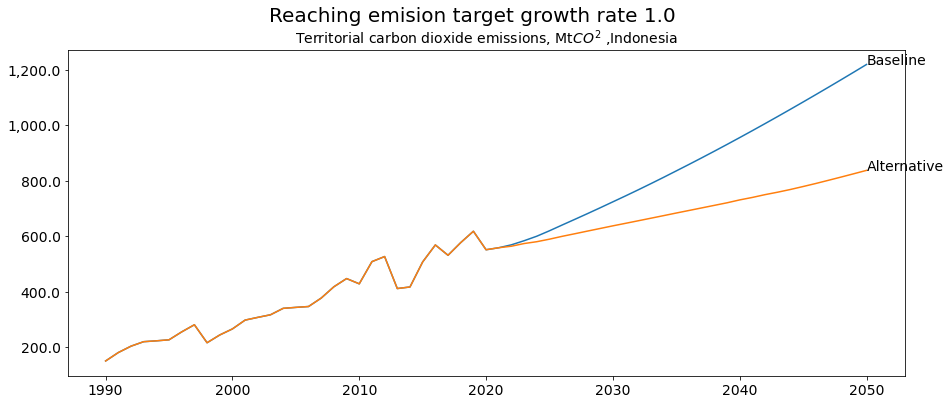

In [27]:
with masia.set_smpl(1990,2050):

    masia['idn_co2'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

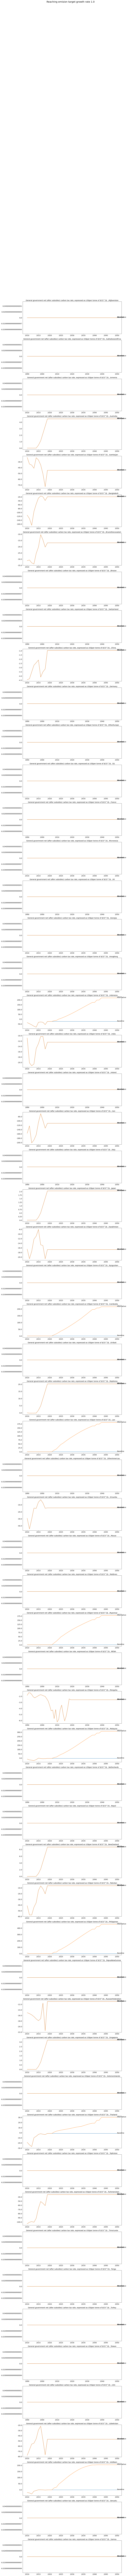

In [30]:
with masia.set_smpl(1990,2050):
    masia['*_GCARBR'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

In [ ]:
masia['IDN_share*'].df

# Tax in each country 

In [ ]:
masia.exodif().rename(columns=masia.var_description).T

# World reduction 

# ASEAN reduction

In [ ]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


In [ ]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)


# not used  

In [ ]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') 
                       and  var.split('_')[0] in masia.countries_ASEAN ]

In [ ]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))